In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Upload the Yahoo End Rank vs. Draft Sheet 
file_path = r"C:\Users\kenbo\OneDrive\Desktop\Fantasy Hockey Data Project\Yahoo End vs. Draft.xlsx"

# read in the excel file
df = pd.read_excel(file_path)

df.head(10)

,Player Name,Rank,Pos Rank,Preseason,All Drafts,Change
0,Connor McDavid,1.0,C1,1.2,1.1,0.1
1,Leon Draisaitl,2.0,LW1,2.5,2.4,0.4
2,Auston Matthews,12.0,C5,3.1,3.1,-8.9
3,Nathan MacKinnon,7.0,C3,4.6,4.7,-2.3
4,Cale Makar,73.0,D13,5.5,5.4,-67.6
5,Kirill Kaprizov,47.0,LW16,6.8,6.8,-40.2
6,Nikita Kucherov,6.0,RW2,8.9,8.6,2.6
7,Mikko Rantanen,9.0,C4,8.7,8.8,-0.2
8,Igor Shesterkin,36.0,G9,9,8.9,-27.1
9,Andrei Vasilevskiy,43.0,G10,8.9,8.9,-34.1


In [291]:

# Convert 'All Drafts' column to numeric type
df['All Drafts'] = pd.to_numeric(df['All Drafts'], errors='coerce')

# Convert Pos Rank to Position 
df['Position'] = df['Pos Rank'].str.extract('([A-Za-z]+)')

# Sort the data in ascending order based on 'All Drafts' column
df_sorted = df.sort_values('All Drafts')

# Replace NaN values with "Not Drafted" in 'All Drafts' column
df_sorted['All Drafts'].fillna("Not Drafted", inplace=True)

# Assign bins based on conditions in 'Change' column
df_sorted['Change Bin'] = np.where(df_sorted['Change '] > 0, 'Improved',
                                   np.where((df_sorted['Change '] >= -15) & (df_sorted['Change '] < 0), 'Relatively Similar',
                                            np.where(df_sorted['Change '] < -15, 'Disappointing', 'Not Available')))

df_sorted.head(10)




,Player Name,Rank,Pos Rank,Preseason,All Drafts,Change,Position,Change Bin
0,Connor McDavid,1.0,C1,1.2,1.1,0.1,C,Improved
1,Leon Draisaitl,2.0,LW1,2.5,2.4,0.4,LW,Improved
2,Auston Matthews,12.0,C5,3.1,3.1,-8.9,C,Relatively Similar
3,Nathan MacKinnon,7.0,C3,4.6,4.7,-2.3,C,Relatively Similar
4,Cale Makar,73.0,D13,5.5,5.4,-67.6,D,Disappointing
5,Kirill Kaprizov,47.0,LW16,6.8,6.8,-40.2,LW,Disappointing
6,Nikita Kucherov,6.0,RW2,8.9,8.6,2.6,RW,Improved
7,Mikko Rantanen,9.0,C4,8.7,8.8,-0.2,C,Relatively Similar
9,Andrei Vasilevskiy,43.0,G10,8.9,8.9,-34.1,G,Disappointing
8,Igor Shesterkin,36.0,G9,9,8.9,-27.1,G,Disappointing


In [292]:
# Convert 'All Drafts' column to numeric type, coercing non-numeric values to NaN
df_sorted['All Drafts'] = pd.to_numeric(df_sorted['All Drafts'], errors='coerce')

# Filter out non-numeric values and NaN values in 'All Drafts' column
df_filtered = df_sorted[pd.to_numeric(df_sorted['All Drafts'], errors='coerce').notnull()]

# Create a DataFrame to store rounds
rounds = pd.DataFrame(columns=['Round', 'Player', 'All Drafts', 'Position','Change Bin'])

# Iterate through each player
for _, player in df.iterrows():
    all_drafts = player['All Drafts']
    
    # Determine the round based on 'All Drafts' value
    if all_drafts <= 12:
        round_number = 1
    elif all_drafts <= 24:
        round_number = 2
    elif all_drafts <= 36:
        round_number = 3
    elif all_drafts <= 48:
        round_number = 4
    elif all_drafts <= 60:
        round_number = 5 
    elif all_drafts <= 72:
        round_number = 6
    elif all_drafts <= 84: 
        round_number = 7
    elif all_drafts <= 96:
        round_number = 8 
    elif all_drafts <= 108:
        round_number = 9
    elif all_drafts <= 120:
        round_number = 10
    elif all_drafts <= 132:
        round_number = 11
    elif all_drafts <= 144:
        round_number = 12
    elif all_drafts <= 156:
        round_number = 13
    elif all_drafts <= 168:
        round_number = 14
    elif all_drafts <= 180:
        round_number = 15
    elif all_drafts <= 192:
        round_number = 16 

    # Determine the change bin based on 'Change ' value
    if player['Change '] > 0:
        change_bin = 'Improved'
    elif -15 <= player['Change '] < 0:
        change_bin = 'Relatively Similar'
    elif player['Change '] < -15:
        change_bin = 'Disappointing'
    else:
        change_bin = 'Not Available'

    # Add the player to the respective round
    round_data = pd.DataFrame({'Round': round_number, 'Player': player, 'All Drafts': all_drafts, 'Change Bin': change_bin}, index=[0])
    rounds = pd.concat([rounds, round_data], ignore_index=True)



In [293]:
# Calculate percentage of each round labeled as 'Disappointing', 'Relatively Similar', and 'Improved'
round_percentages = []
for round_number in range(1, num_rounds + 1):
    round_data = df_sorted[(df_sorted['All Drafts'] >= (round_number - 1) * 12) & (df_sorted['All Drafts'] <= round_number * 12)]
    counts = round_data['Change Bin'].value_counts()
    percentages = counts / counts.sum() * 100
    round_percentages.append([percentages.get(label, 0) for label in round_labels])

# Create a table of the percentages for each round
table_data = pd.DataFrame(round_percentages, columns=round_labels, index=range(1, num_rounds + 1))
table_data.index = range(1, num_rounds + 1)
table_data.index.name = 'Round'

# Display the table
print(table_data)



       Disappointing  Relatively Similar    Improved
Round                                               
1          40.000000           30.000000   30.000000
2          58.333333           25.000000   16.666667
3          55.555556            0.000000   44.444444
4          55.555556           11.111111   33.333333
5          62.500000           12.500000   25.000000
6          54.545455            9.090909   36.363636
7          33.333333           16.666667   50.000000
8          12.500000            0.000000   87.500000
9          16.666667           16.666667   66.666667
10         15.384615           15.384615   69.230769
11         25.000000           12.500000   62.500000
12         27.272727            0.000000   72.727273
13         11.111111           11.111111   77.777778
14         13.636364            4.545455   81.818182
15          6.666667            0.000000   93.333333
16          0.000000            0.000000  100.000000


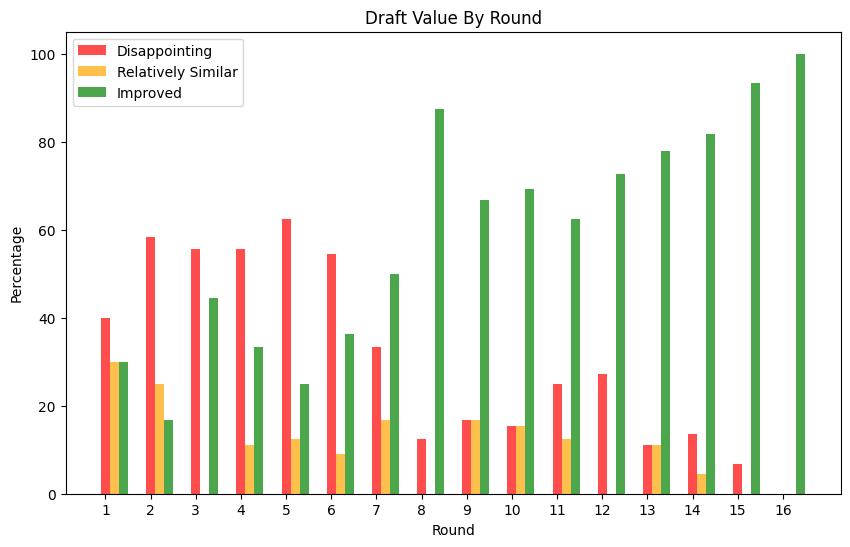

In [294]:
# Prepare data for the side-by-side bar graph
round_numbers = range(1, len(rounds)+1)
bar_width = 0.2
colors = ['red', 'orange', 'green']

# Plotting the side-by-side bar graph
plt.figure(figsize=(10, 6))
for i, label in enumerate(round_labels):
    percentages = table_data[label].values
    bar_positions = np.arange(1, num_rounds + 1) + (i * bar_width)
    plt.bar(bar_positions, percentages, width=bar_width, label=label, color=colors[i], alpha=0.7)

plt.xlabel('Round')
plt.ylabel('Percentage')
plt.title('Draft Value By Round')
plt.xticks(np.arange(1, num_rounds + 1))  # Update the x-axis ticks
plt.legend()
plt.show()


## This exercise shows us that there are more draft 'Busts' in the first 6 rounds than previously expected. Perhaps this signals that the key to good roster construction via the draft is in finding value beyond the 5th round. 

In [295]:
 #Export df_sorted as Excel file
#export_file_path = r"C:\Users\kenbo\OneDrive\Desktop\Fantasy Hockey Data Project\Draft Value_2.xlsx"
#df_sorted.to_excel(export_file_path, index=False)
#print("DataFrame exported to Excel successfully.")
